<a href="https://colab.research.google.com/github/matlarakshan/Vehicle_Insurance/blob/main/Vehicle_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#To read the uploaded train files
df = pd.read_csv("/content/train-Health Insurance Cross Sell Prediction.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [5]:
df.shape

(381109, 12)

In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df.describe(include=["object"])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [8]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [11]:
#Dropping unwanted data
df.drop(['id'], axis=1, inplace=True)

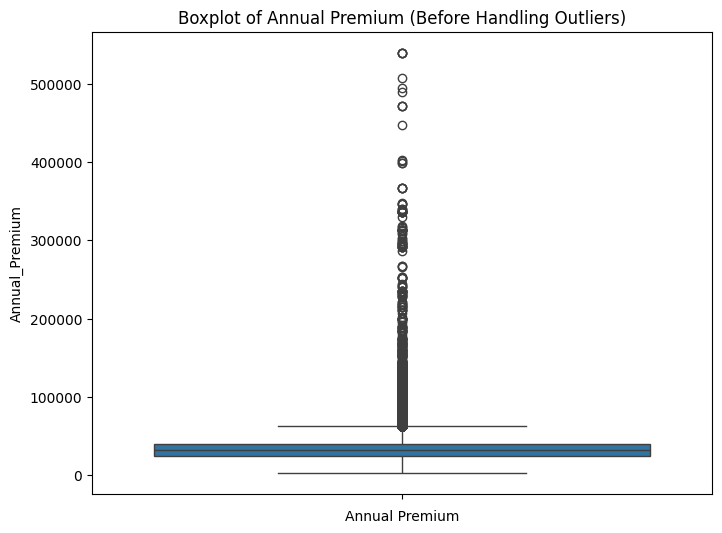

In [12]:
# Before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df["Annual_Premium"])
plt.title("Boxplot of Annual Premium (Before Handling Outliers)")
plt.xlabel("Annual Premium")
plt.show()

In [13]:
# Handling outliers by replacing with median
median_premium = df["Annual_Premium"].median()
df["Annual_Premium"] = df["Annual_Premium"].apply(lambda x: median_premium if x > 1.5 * median_premium else x)

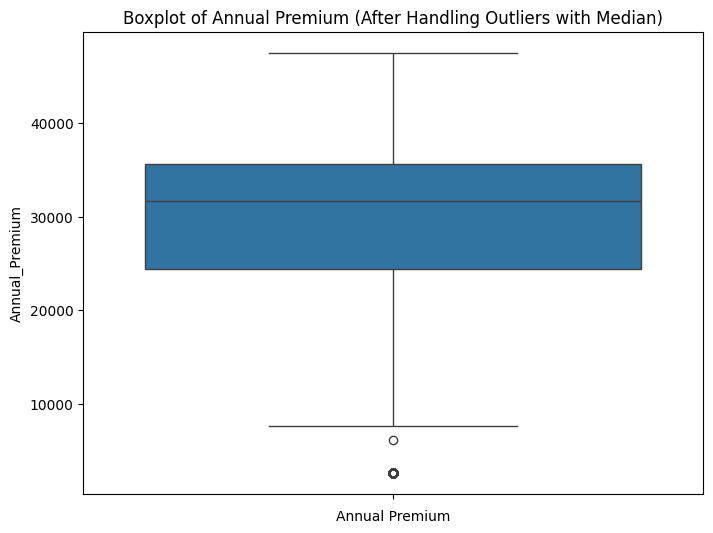

In [14]:
# After handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df["Annual_Premium"])
plt.title("Boxplot of Annual Premium (After Handling Outliers with Median)")
plt.xlabel("Annual Premium")
plt.show()

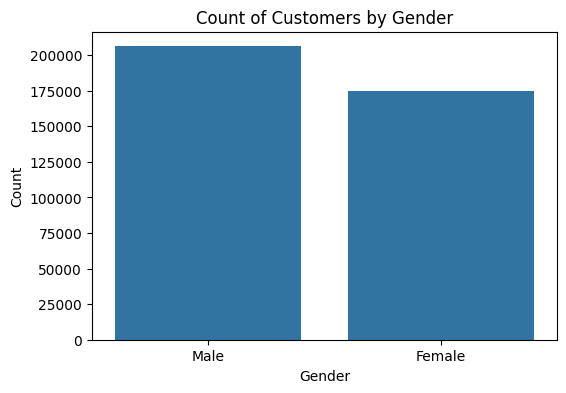

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df)
plt.title("Count of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='Frequency'>

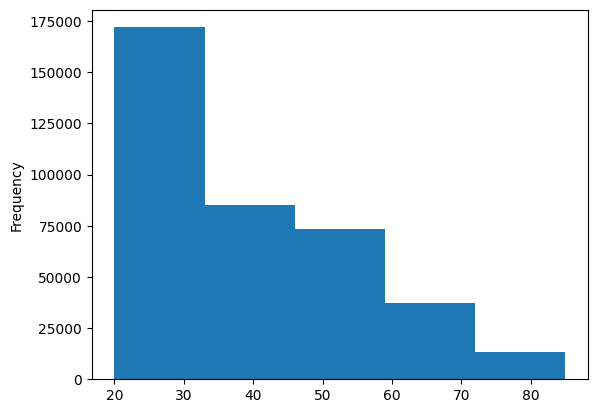

In [16]:
# Histogram on Numeric data of Age
df['Age'].plot(kind='hist',bins=5)

<Axes: xlabel='Age', ylabel='Density'>

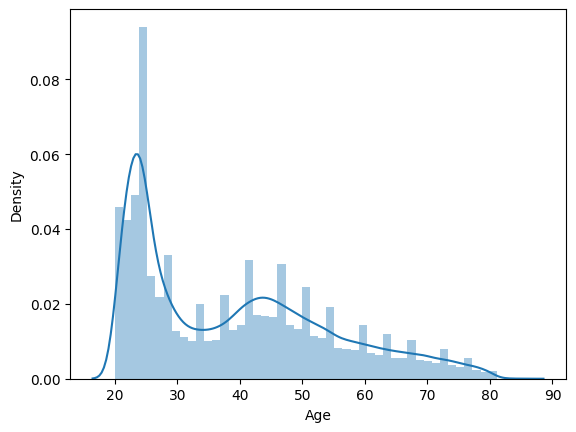

In [17]:
# Distplot
sns.distplot(df['Age'])

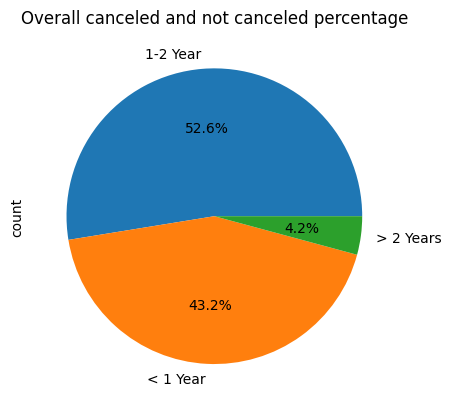

In [18]:
df['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall canceled and not canceled percentage')
plt.show()

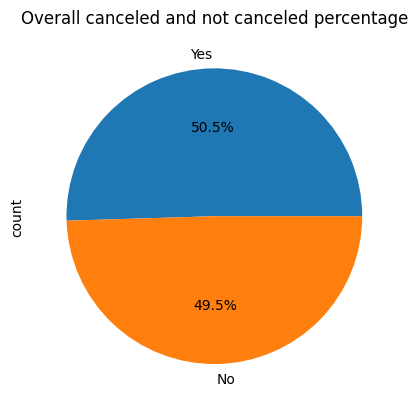

In [19]:
df['Vehicle_Damage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall canceled and not canceled percentage')
plt.show()

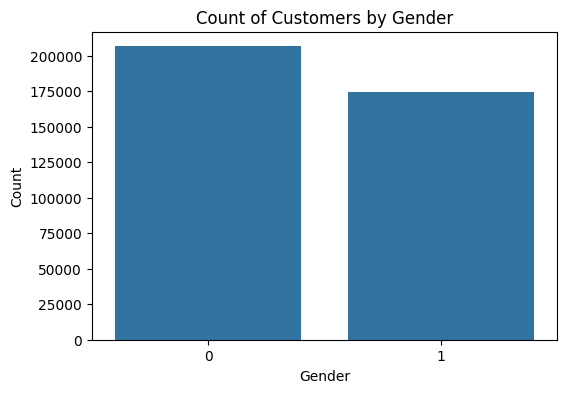

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Previously_Insured", data=df)
plt.title("Count of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

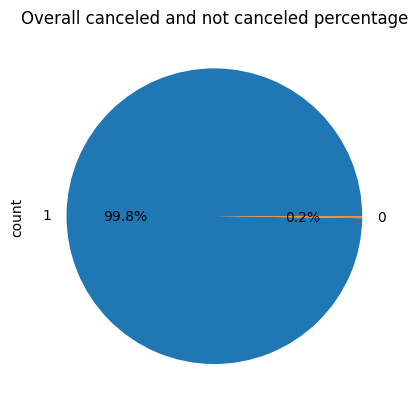

In [21]:
df['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall canceled and not canceled percentage')
plt.show()

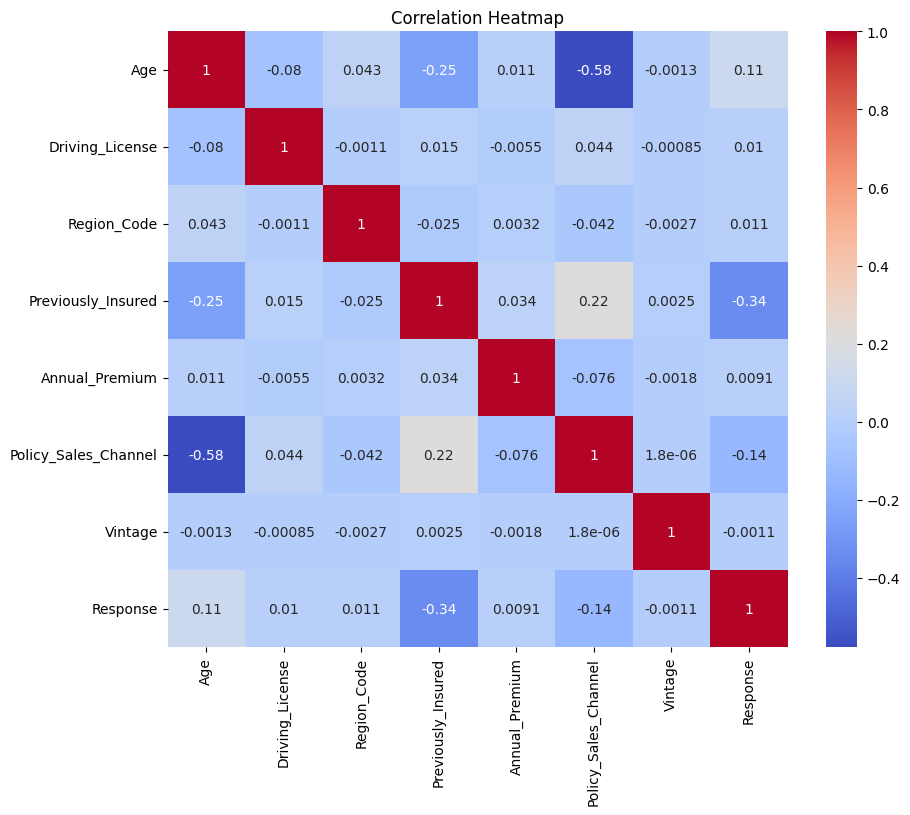

In [24]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Creating the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

A value like "1.8e-06" is scientific notation and represents a very small number. Specifically, "1.8e-06" is equal to
1.8×10^−6

1 indicates a perfect positive correlation,

−1 indicates a perfect negative correlation,

0 indicates no correlation.

Therefore, a value like "1.8e-06" close to zero indicates that there is almost no linear relationship between the two variables.



There are 3 non-numeric columns in a DataFrame:

Gender

Vehicle_Age

Vehicle_Damage

In [25]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [26]:
df.Gender.replace({'Male':1,'Female':2}, inplace=True)
df.Vehicle_Damage.replace({'Yes':1,'No':0}, inplace=True)
df.Vehicle_Age.replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [27]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,2,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,2,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,2,68,1,14.0,0,3,1,44617.0,124.0,74,0


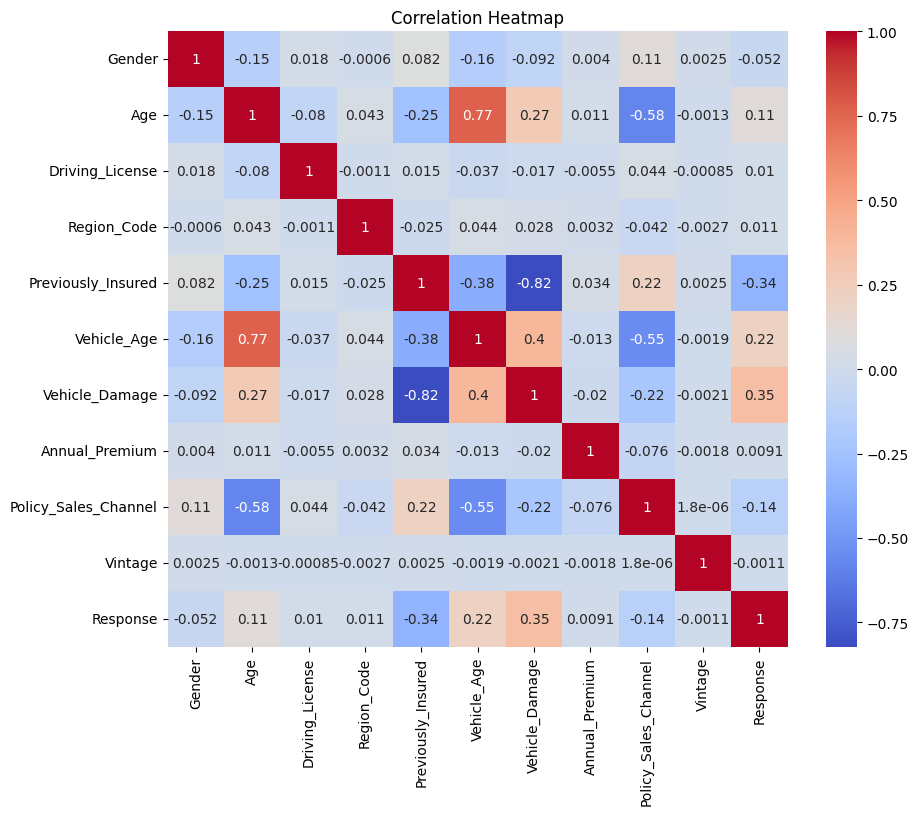

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [30]:
df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,1.459239,38.822584,0.997869,26.388807,0.458210,1.609616,0.504877,27575.014558,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,12726.482117,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,1.000000,25.000000,1.000000,15.000000,0.000000,1.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,2.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,2.000000,49.000000,1.000000,35.000000,1.000000,2.000000,1.000000,35595.000000,152.000000,227.000000,0.000000
max,2.000000,85.000000,1.000000,52.000000,1.000000,3.000000,1.000000,47503.000000,163.000000,299.000000,1.000000


In [31]:
# Splliting up of data
X = df.drop(["Response"], axis = 1)

In [32]:
y = df[["Response"]]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [35]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [36]:
X_train_std = scaler.transform(X_train[num_cols])
X_test_std = scaler.transform(X_test[num_cols])

In [37]:
print(X_train_std.shape)
print(X_test_std.shape)

(304887, 10)
(76222, 10)


In [38]:
print(X.shape, y.shape)

(381109, 10) (381109, 1)


In [39]:
# Print the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304887, 10), (76222, 10), (304887, 1), (76222, 1))

In [40]:
y_train.value_counts()

Response
0           267700
1            37187
Name: count, dtype: int64

In [41]:
y_train.value_counts(normalize=True)*100

Response
0           87.803022
1           12.196978
Name: proportion, dtype: float64

In [42]:
y_test.value_counts(normalize=True)*100

Response
0           87.506232
1           12.493768
Name: proportion, dtype: float64

In [43]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score, precision_score, f1_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print(classification_report(act,pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred,average='weighted'))
    print("Precision: ", precision_score(act, pred, average='weighted'))
    print("F1_score : ", f1_score(act, pred, average='weighted'))

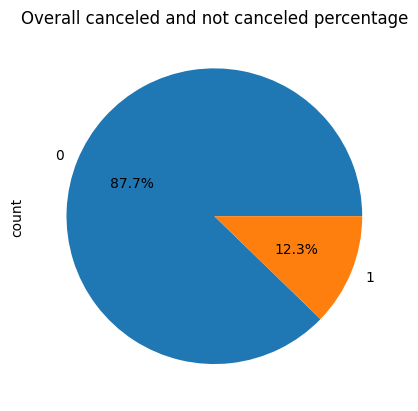

In [44]:
df['Response'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall canceled and not canceled percentage')
plt.show()

UpSampling

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [46]:
np.unique(y_train, return_counts= True)
np.unique(y_train_sm, return_counts= True)

(array([0, 1]), array([267700, 267700]))

In [47]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

# Fit the Algorithm
m1.fit(X_train, y_train)

# Predict on the model
train_pred_lr = m1.predict(X_train)
test_pred_lr = m1.predict(X_test)

In [48]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_lr)
print("--Test--")
evaluate_model(y_test, test_pred_lr)

--Train--
Confusion Matrix 
 [[265006   2694]
 [ 35657   1530]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    267700
           1       0.36      0.04      0.07     37187

    accuracy                           0.87    304887
   macro avg       0.62      0.52      0.50    304887
weighted avg       0.82      0.87      0.83    304887

Accurcay :  0.8742124131235507
Recall   :  0.8742124131235507
Precision:  0.8180799965560717
F1_score :  0.8277968032031943
--Test--
Confusion Matrix 
 [[66052   647]
 [ 9139   384]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     66699
           1       0.37      0.04      0.07      9523

    accuracy                           0.87     76222
   macro avg       0.63      0.52      0.50     76222
weighted avg       0.82      0.87      0.82     76222

Accurcay :  0.871611870588544
Recall   :  0.871611870588544
Precision:  0.8152374474986661
F1_score

In [49]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
m2 = LogisticRegression(solver='saga',penalty='l2', max_iter=1000)

# Fit the Algorithm
m2.fit(X_train_sm, y_train_sm)

# Predict on the model
train_pred_lr_hp = m2.predict(X_train)
test_pred_lr_hp = m2.predict(X_test)

In [50]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_lr_hp)
print("--Test--")
evaluate_model(y_test, test_pred_lr_hp)

--Train--
Confusion Matrix 
 [[174050  93650]
 [ 17280  19907]]
              precision    recall  f1-score   support

           0       0.91      0.65      0.76    267700
           1       0.18      0.54      0.26     37187

    accuracy                           0.64    304887
   macro avg       0.54      0.59      0.51    304887
weighted avg       0.82      0.64      0.70    304887

Accurcay :  0.6361602823341107
Recall   :  0.6361602823341107
Precision:  0.8201125732050754
F1_score :  0.6980581372609349
--Test--
Confusion Matrix 
 [[43667 23032]
 [ 4462  5061]]
              precision    recall  f1-score   support

           0       0.91      0.65      0.76     66699
           1       0.18      0.53      0.27      9523

    accuracy                           0.64     76222
   macro avg       0.54      0.59      0.51     76222
weighted avg       0.82      0.64      0.70     76222

Accurcay :  0.6392904935582903
Recall   :  0.6392904935582903
Precision:  0.8164437384930197
F1_sco

In [51]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
m3 = RandomForestClassifier()

# Fit the Algorithm
m3.fit(X_train, y_train)

# Predict on the model
train_pred_rf = m3.predict(X_train)
test_pred_rf = m3.predict(X_test)

In [52]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_rf)
print("--Test--")
evaluate_model(y_test, test_pred_rf)

--Train--
Confusion Matrix 
 [[267603     97]
 [   233  36954]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267700
           1       1.00      0.99      1.00     37187

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

Accurcay :  0.998917631778331
Recall   :  0.998917631778331
Precision:  0.9989168520187351
F1_score :  0.9989167777926604
--Test--
Confusion Matrix 
 [[64597  2102]
 [ 8307  1216]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66699
           1       0.37      0.13      0.19      9523

    accuracy                           0.86     76222
   macro avg       0.63      0.55      0.56     76222
weighted avg       0.82      0.86      0.83     76222

Accurcay :  0.8634383773713626
Recall   :  0.8634383773713626
Precision:  0.8211417883446225
F1_score

In [ ]:
param_grid = {"n_estimators" : [100,300,700],
              "max_depth" : [3,5,7,11],
              "max_features" : [3,5,7,9],
              "min_samples_leaf" : [2,4,6]}

In [ ]:
#Returning the best combination of parameters
#specifing the no.of folds
#m4 = RandomForestClassifier()
#from sklearn.model_selection import GridSearchCV
#m4 = GridSearchCV(m4,param_grid,cv=5)
#m4.fit(X_train,y_train)

In [ ]:
#m4.best_params_

In [53]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
m4 = RandomForestClassifier(max_depth=11, n_estimators=100, max_features=9, min_samples_leaf=2)

# Fit the Algorithm
m4.fit(X_train_sm, y_train_sm)

# Predict on the model
train_pred_rf_hp = m4.predict(X_train_sm)
test_pred_rf_hp = m4.predict(X_test)

In [54]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train_sm, train_pred_rf_hp)
print("--Test--")
evaluate_model(y_test, test_pred_rf_hp)

--Train--
Confusion Matrix 
 [[208057  59643]
 [ 22671 245029]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83    267700
           1       0.80      0.92      0.86    267700

    accuracy                           0.85    535400
   macro avg       0.85      0.85      0.85    535400
weighted avg       0.85      0.85      0.85    535400

Accurcay :  0.8462570041090773
Recall   :  0.8462570041090773
Precision:  0.8529900505625625
F1_score :  0.8455203554263633
--Test--
Confusion Matrix 
 [[51935 14764]
 [ 2806  6717]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     66699
           1       0.31      0.71      0.43      9523

    accuracy                           0.77     76222
   macro avg       0.63      0.74      0.64     76222
weighted avg       0.87      0.77      0.80     76222

Accurcay :  0.7694891238749967
Recall   :  0.7694891238749968
Precision:  0.8692743827156318
F1_sco

In [55]:
# ML Model - 5 Implementation
from sklearn.tree import DecisionTreeClassifier
m5 = DecisionTreeClassifier()
m5.fit(X_train,y_train)

train_pred_dt = m5.predict(X_train)
test_pred_dt = m5.predict(X_test)

In [56]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_dt)
print("--Test--")
evaluate_model(y_test, test_pred_dt)

--Train--
Confusion Matrix 
 [[267689     11]
 [   313  36874]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    267700
           1       1.00      0.99      1.00     37187

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

Accurcay :  0.9989373112005432
Recall   :  0.9989373112005432
Precision:  0.9989381726430172
F1_score :  0.9989354443921867
--Test--
Confusion Matrix 
 [[59750  6949]
 [ 6601  2922]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.30      0.31      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222

Accurcay :  0.822229802419249
Recall   :  0.822229802419249
Precision:  0.8249896927654554
F1_score

In [57]:
#To read the uploaded test files
test = pd. read_csv("/content/test-Health Insurance Cross Sell Prediction.csv")

In [58]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [59]:
test.describe(include=["object"])

,Gender,Vehicle_Age,Vehicle_Damage
count,127037,127037,127037
unique,2,3,2
top,Male,1-2 Year,Yes
freq,68236,66699,63835


In [60]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [61]:
test.dropna(inplace = True)

In [62]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [63]:
a = test['id']

In [64]:
test.drop(['id'], axis=1, inplace=True)

In [65]:
test.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [66]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
127032,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [67]:
test.Gender.replace({'Male':1,'Female':2}, inplace=True)
test.Vehicle_Damage.replace({'Yes':1,'No':0}, inplace=True)
test.Vehicle_Age.replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [68]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,2,1,33762.0,7.0,111
2,1,47,1,28.0,0,2,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
127032,2,26,1,37.0,1,1,0,30867.0,152.0,56
127033,2,38,1,28.0,0,2,1,28700.0,122.0,165
127034,1,21,1,46.0,1,1,0,29802.0,152.0,74
127035,1,71,1,28.0,1,2,0,62875.0,26.0,265


In [69]:
scaler = StandardScaler()
scaler.fit(test[num_cols])

StandardScaler()

In [70]:
test_std = scaler.transform(test[num_cols])

In [71]:
predicted_model = m1.predict(test_std)

In [72]:
predicted_model

array([0, 1, 1, ..., 0, 0, 0])

In [73]:
test['Response'] = predicted_model

In [74]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,25,1,11.0,1,1,0,35786.0,152.0,53,0
1,1,40,1,28.0,0,2,1,33762.0,7.0,111,1
2,1,47,1,28.0,0,2,1,40050.0,124.0,199,1
3,1,24,1,27.0,1,1,1,37356.0,152.0,187,0
4,1,27,1,28.0,1,1,0,59097.0,152.0,297,0


In [75]:
test['id'] = a

In [76]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,id
0,1,25,1,11.0,1,1,0,35786.0,152.0,53,0,381110
1,1,40,1,28.0,0,2,1,33762.0,7.0,111,1,381111
2,1,47,1,28.0,0,2,1,40050.0,124.0,199,1,381112
3,1,24,1,27.0,1,1,1,37356.0,152.0,187,0,381113
4,1,27,1,28.0,1,1,0,59097.0,152.0,297,0,381114


In [77]:
test.shape

(127037, 12)

In [78]:
test.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'id'],
      dtype='object')

In [79]:
test.drop(["Gender","Age","Driving_License",
              "Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Annual_Premium",
              "Policy_Sales_Channel","Vintage"], axis=1, inplace=True)

In [80]:
test.columns

Index(['Response', 'id'], dtype='object')

In [81]:
predicted_model = test

In [82]:
test.to_csv('Predictions.csv', index=False)

In [83]:
test['Response'].replace(to_replace=0,value="Not intrested",inplace=True)
test['Response'].replace(to_replace=1,value="intrested",inplace=True)

In [84]:
test.head()

,Response,id
0,Not intrested,381110
1,intrested,381111
2,intrested,381112
3,Not intrested,381113
4,Not intrested,381114


In [85]:
test['Response'].value_counts()

Response
intrested        64434
Not intrested    62603
Name: count, dtype: int64